### CUSTOMER  SEGMENTATION USING CLUSTERING

#### 1. Importing Libraries

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, confusion_matrix, classification_report
from mpl_toolkits.mplot3d import Axes3D

#### 2. Load dataset

In [17]:
file_path = 'C:\\Users\\srira\\Downloads\\OPTIFYX INTERNSHIP 2\\Mall_Customers.csv'
data = pd.read_csv(file_path)

#### 3. Data Analysis (EDA)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [19]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [20]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [21]:
# Check for missing values
print("\nMissing Values:\n", data.isnull().sum())


Missing Values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [22]:
# Rename columns for better access
data.columns = data.columns.str.replace(' ', '_')

#### 4. Data Pre-processing

In [23]:
# Selecting features for clustering
features = ['Age', 'Annual_Income_(k$)', 'Spending_Score_(1-100)']
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])

#### 5. Data Visualizations

C:\Users\srira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\srira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\srira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


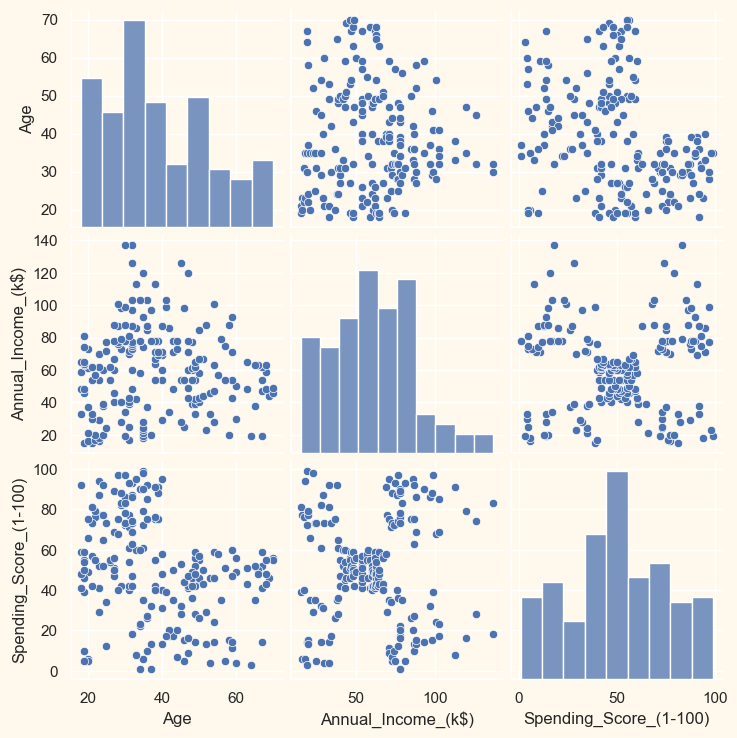

In [24]:
# Pair plot
sns.pairplot(data[features])
plt.show()

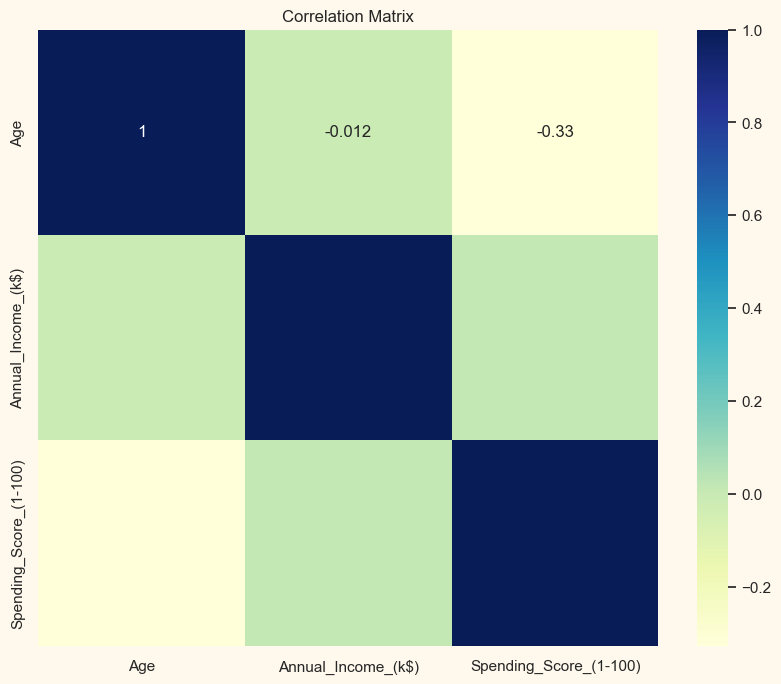

In [26]:
# Heatmap of correlation
plt.figure(figsize=(10, 8))
corr_matrix = data[features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.title("Correlation Matrix")
plt.show()

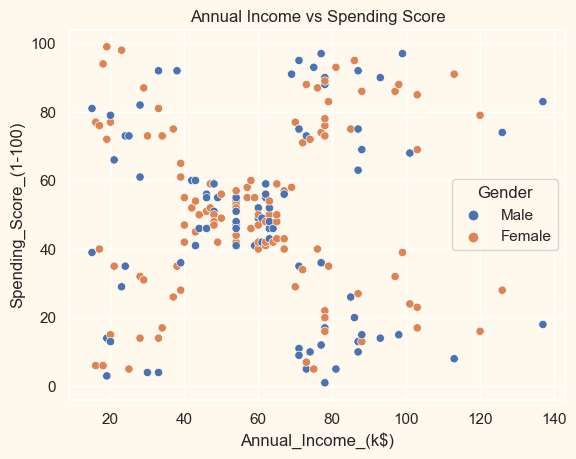

In [27]:
# Scatter plot (2D)
sns.scatterplot(x='Annual_Income_(k$)', y='Spending_Score_(1-100)', data=data, hue='Gender')
plt.title("Annual Income vs Spending Score")
plt.show()

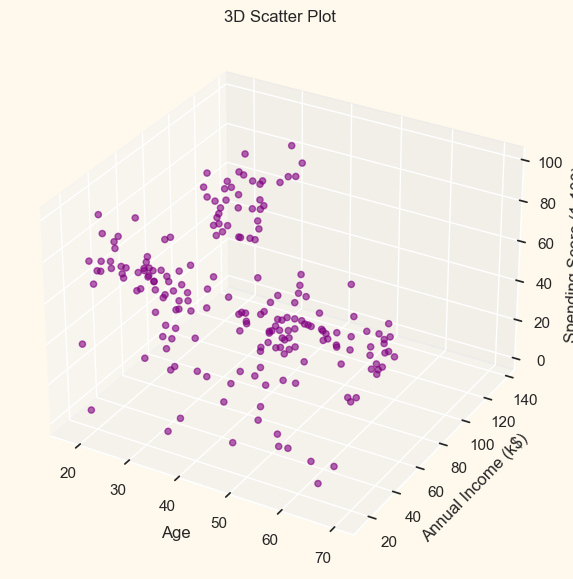

In [29]:
# 3D Scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['Age'], data['Annual_Income_(k$)'], data['Spending_Score_(1-100)'], c='purple', alpha=0.6)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.title("3D Scatter Plot")
plt.show()

C:\Users\srira\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


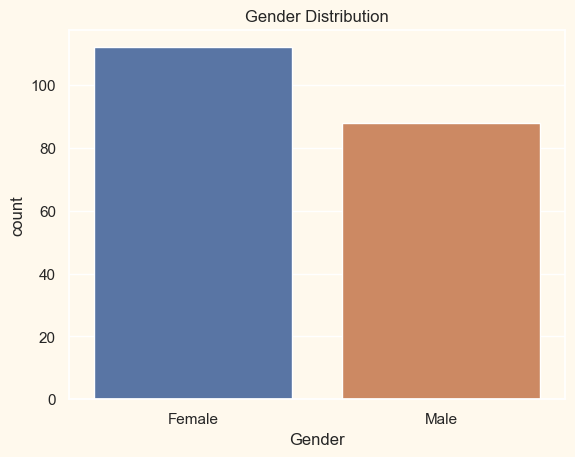

In [30]:
# Countplot of gender
data['Gender'] = data['Gender'].astype('category')
sns.countplot(x='Gender', data=data)
plt.title("Gender Distribution")
plt.show()

C:\Users\srira\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


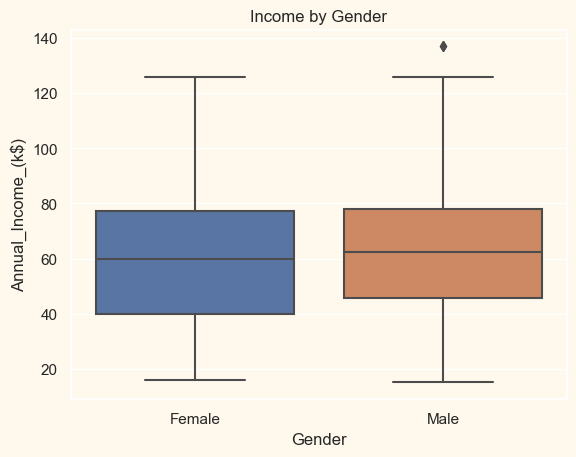

In [31]:
# Boxplots
sns.boxplot(y='Annual_Income_(k$)', x='Gender', data=data)
plt.title("Income by Gender")
plt.show()

C:\Users\srira\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


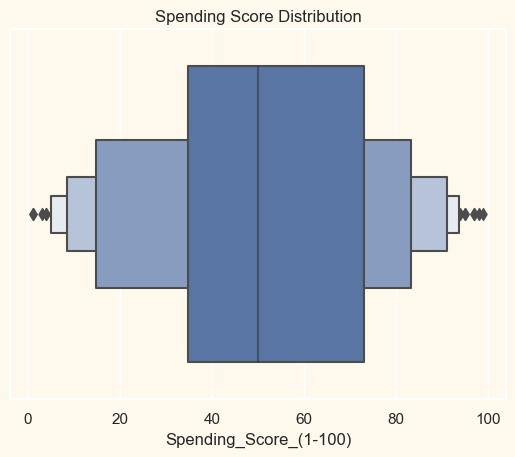

In [32]:
# Boxen Plot
sns.boxenplot(x='Spending_Score_(1-100)', data=data)
plt.title("Spending Score Distribution")
plt.show()

#### 6. Clustering

C:\Users\srira\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\srira\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\srira\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\srira\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

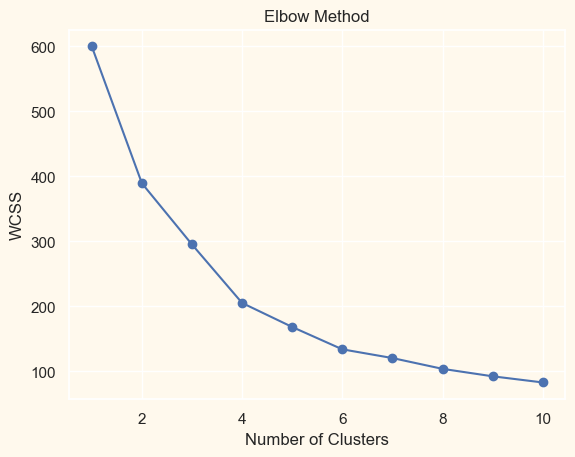

In [33]:
# K-Means Clustering
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [34]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)
data['KMeans_Cluster'] = kmeans_labels

C:\Users\srira\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\srira\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [35]:
# Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(data_scaled)
data['GMM_Cluster'] = gmm_labels

C:\Users\srira\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [36]:
# DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_scaled)
data['DBSCAN_Cluster'] = dbscan_labels

#### 7. Evaluate the Models

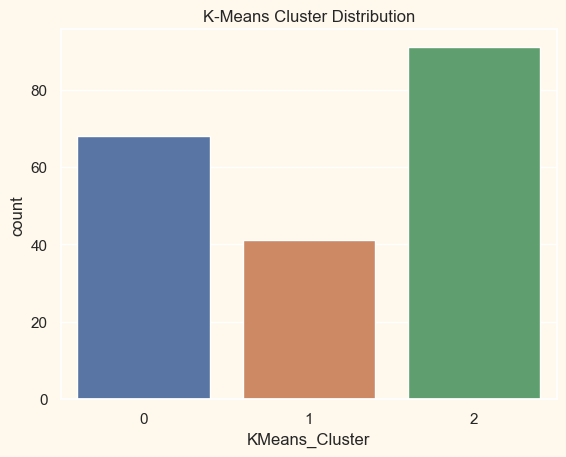

In [37]:
# Visualize cluster distributions
sns.countplot(x='KMeans_Cluster', data=data)
plt.title("K-Means Cluster Distribution")
plt.show()

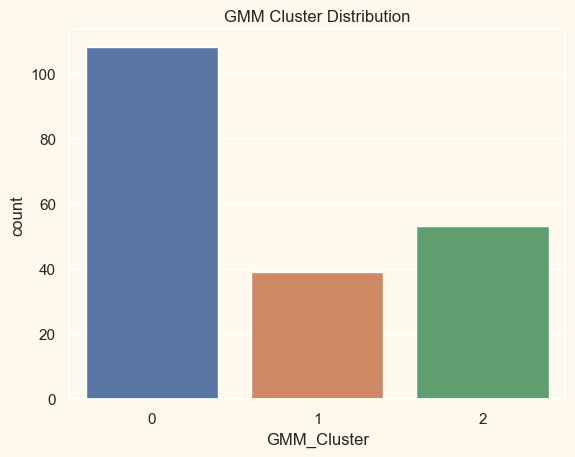

In [38]:
sns.countplot(x='GMM_Cluster', data=data)
plt.title("GMM Cluster Distribution")
plt.show()

#### 8. Performance Metrics

In [39]:
# KMeans performance
silhouette_kmeans = silhouette_score(data_scaled, kmeans_labels)
davies_bouldin_kmeans = davies_bouldin_score(data_scaled, kmeans_labels)
calinski_harabasz_kmeans = calinski_harabasz_score(data_scaled, kmeans_labels)
print("KMeans Silhouette Score:", silhouette_kmeans)
print("KMeans Davies-Bouldin Index:", davies_bouldin_kmeans)
print("KMeans Calinski-Harabasz Index:", calinski_harabasz_kmeans)

KMeans Silhouette Score: 0.357793388710272
KMeans Davies-Bouldin Index: 1.050270139649266
KMeans Calinski-Harabasz Index: 101.6949470919303


In [40]:
# GMM performance
silhouette_gmm = silhouette_score(data_scaled, gmm_labels)
davies_bouldin_gmm = davies_bouldin_score(data_scaled, gmm_labels)
calinski_harabasz_gmm = calinski_harabasz_score(data_scaled, gmm_labels)
print("GMM Silhouette Score:", silhouette_gmm)
print("GMM Davies-Bouldin Index:", davies_bouldin_gmm)
print("GMM Calinski-Harabasz Index:", calinski_harabasz_gmm)

GMM Silhouette Score: 0.33478209374027373
GMM Davies-Bouldin Index: 1.0191010891937724
GMM Calinski-Harabasz Index: 90.86407901454545


In [45]:
# DBSCAN performance
valid_mask = dbscan_labels != -1
valid_labels = dbscan_labels[valid_mask]

if len(valid_labels) > 0 and len(np.unique(valid_labels)) > 1:
    silhouette_dbscan = silhouette_score(data_scaled[valid_mask], valid_labels)
    print("DBSCAN Silhouette Score:", silhouette_dbscan)
else:
    print("DBSCAN resulted in insufficient clusters for silhouette scoring.")

DBSCAN resulted in insufficient clusters for silhouette scoring.


In [46]:
# Classification report and confusion matrix
print("Classification Report (KMeans):\n")
print(classification_report(kmeans_labels, kmeans_labels))  # Placeholder labels

Classification Report (KMeans):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        68
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        91

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



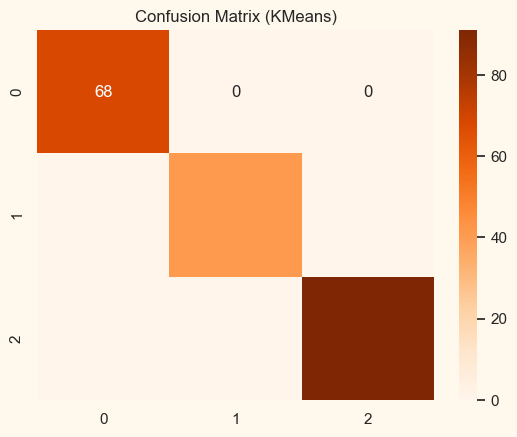

In [47]:
conf_matrix = confusion_matrix(kmeans_labels, kmeans_labels)  # Placeholder
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix (KMeans)")
plt.show()